In [13]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter
import numpy as np
from os.path import expanduser
home = expanduser('~')
import warnings
warnings.filterwarnings("ignore")

### Settings
# ITERS_1 = ['U0', 'rlx-exp-U0', 'exp-U0', 'U2', 'U2.2', 'rlx-exp-U2', 'exp-U2', 'U4', 'rlx-exp-U4', 'exp-U4']
# ITERS_1 = ['U0', 'exp-U0', 'U2', 'exp-U2', 'U2.2', 'U2.5', 'U3', 'U4', 'exp-U4']
# ITERS_1 = ['U0', 'U2', 'U2.5', 'U3', 'U4', 'exp-U0', 'exp-U2', 'exp-U3', 'exp-U4']
ITERS_1 = [f'chg-init-U2-M1-disp{disp}' for disp in [0, 6]]

ITERS_2 = ['']
DOPING_LABELS = ITERS_1
YLIMS = [[-1, 0.5]]*10
XLIMS = []
FIG_SIZE = [7, 2.5]
PREFIX = home + '/Projects/BaCoS2/correct_mag/disp-estruc'
#PREFIX = home + '/Projects/storage/BaCoS2/correct_mag/disp-estruc'

bands = []

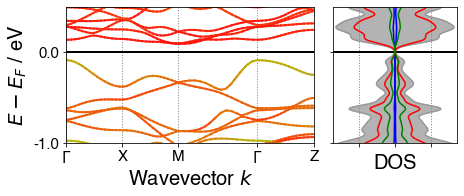

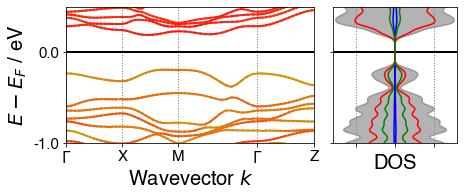

In [15]:
### Execute
for i, iter1 in enumerate(ITERS_1):
    for j, iter2 in enumerate(ITERS_2):
        label = iter1
        
        vbands = BSVasprun(PREFIX + f'/vasprun-bands-{iter1}.xml',
                           parse_projected_eigen=True)
        vdos   = Vasprun(PREFIX + f'/vasprun-bands-{iter1}.xml', 
                           parse_projected_eigen=True)

        bs = vbands.get_band_structure(kpoints_filename="KPOINTS.bands",line_mode=True)
        dos = vdos.complete_dos
        
        if i == -1:  dos_legend = 'lower left'
        else:       dos_legend = None
        plt = BSDOSPlotter(bs_legend = None, dos_legend=dos_legend, 
                           fig_size=FIG_SIZE, cb_energy_range=YLIMS[i][1], fixed_cb_energy=True,
                           vb_energy_range=abs(YLIMS[i][0]), rgb_legend=False, font='Helvetica')
        plot = plt.get_plot(bs, dos)
        fig = plot.gcf()
#         t = plot.text(0.01, 0.01, f"{DOPING_LABELS[i]}", horizontalalignment='left', 
#                       verticalalignment='bottom', transform=plot.gca().transAxes, 
#                       fontsize=24, color='grey')
#         t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='grey'))
        bands.append(bs)
        
        plot.show()
#         fig.savefig(f"elec_bs_dos-vec-{label}.pdf", img_format='pdf', bbox_inches='tight')
        fig.savefig(f"pub_elec_bs_dos-{label}.png", img_format='png', dpi=300, bbox_inches='tight')

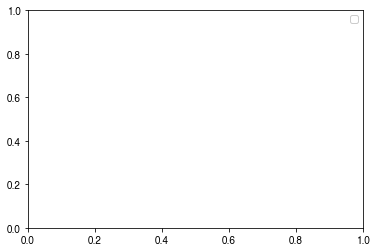

In [30]:
ax = plot.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, framealpha=1)

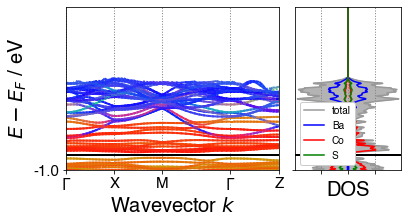

In [34]:
### Creating a throwaway plot just to get the legend colors
label = ITERS_1[0]
iter2 = ''

vbands = BSVasprun(PREFIX + f'/vasprun-bands-{iter1}.xml',
                   parse_projected_eigen=True)
vdos   = Vasprun(PREFIX + f'/vasprun-bands-{iter1}.xml', 
                   parse_projected_eigen=True)

bs = vbands.get_band_structure(kpoints_filename="KPOINTS.bands",line_mode=True)
dos = vdos.complete_dos

plt = BSDOSPlotter(bs_legend = None, dos_legend='upper right', 
                   fig_size=(6,3), cb_energy_range=10, fixed_cb_energy=True,
                   vb_energy_range=1, rgb_legend=False, font='Helvetica', egrid_interval=500)
plot = plt.get_plot(bs, dos)
fig = plot.gcf()

ax = plot.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, framealpha=1)

plot.show()
#         fig.savefig(f"elec_bs_dos-vec-{label}.pdf", img_format='pdf', bbox_inches='tight')
fig.savefig(f"pub_elec_bs_dos-legend.png", img_format='png', dpi=300, bbox_inches='tight')

In [ ]:
### Plotting some comparisons

# Indices at which we compare band structures
i1 = 0
i2 = 4
FIG_SIZE = [10, 7]

p1 = BSPlotter(bands[i1])
p2 = BSPlotter(bands[i2])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
band_plot.ylim(YLIMS[i])


band_plot.plot([0,10],[0,0],'k--')
# band_plot.text(0.6, 0.3, DOPING_LABELS[i], horizontalalignment='right', verticalalignment='bottom',\
#      transform=band_plot.gca().transAxes, fontsize=40, color='grey')

import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linewidth=2,
                                 color='b', label=DOPING_LABELS[i1]),
                   mlines.Line2D([], [], linewidth=2,
                                 color='w', label='_nolegend_',
                                 linestyle="--"),
                   mlines.Line2D([], [], linewidth=2,
                                 color='c', label=DOPING_LABELS[i2])]
band_plot.legend(handles = handles, fontsize=20, loc='lower right',framealpha=0.7)

### Showing and saving
fig.set_size_inches(1FIG_SIZE)    #plt.bs_plot_data(zero_to_efermi=True)
band_plot.tight_layout() #prevents edges from being cut off
fig.savefig(f'band-comp-{suffix}.png',dpi=400)
fig.savefig(f'band-comp-vec-{suffix}.pdf')

In [ ]:
### Plotting some comparisons

p1 = BSPlotter(bands[0.8])
p2 = BSPlotter(bands[1])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
band_plot.ylim(YLIMS[i])


band_plot.plot([0,10],[0,0],'k--')
# band_plot.text(0.6, 0.3, DOPING_LABELS[i], horizontalalignment='right', verticalalignment='bottom',\
#      transform=band_plot.gca().transAxes, fontsize=40, color='grey')

import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linewidth=2,
                                 color='b', label='disp = 0 $\AA$'),
                   mlines.Line2D([], [], linewidth=2,
                                 color='w', label='_nolegend_',
                                 linestyle="--"),
                   mlines.Line2D([], [], linewidth=2,
                                 color='c', label='disp = 0.2 $\AA$')]
band_plot.legend(handles = handles, fontsize=20, loc='center right',framealpha=0.3)

### Showing and saving
fig.set_size_inches(10, 7)    #plt.bs_plot_data(zero_to_efermi=True)
band_plot.tight_layout() #prevents edges from being cut off
fig.savefig(f'band-comp-{suffix}.png',dpi=400)
#     fig.savefig(f'band-comp-vec-{suffix}.pdf')